In [114]:
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "defects_data.csv")
df = pd.read_csv(path_file, header=0)

In [115]:
df.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [116]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [117]:
from sklearn.preprocessing import LabelEncoder

df = df.drop(['defect_date', 'defect_id', 'repair_cost'], axis=1)

label_encoders = {}

categorical_columns = ['defect_type', 'defect_location', 'severity', 'inspection_method']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head(20)

,product_id,defect_type,defect_location,severity,inspection_method
0,15,2,0,1,2
1,6,1,0,1,2
2,84,2,1,1,0
3,10,1,1,0,0
4,14,0,0,1,1
5,17,1,1,2,2
6,85,0,1,0,1
7,90,2,1,2,1
8,30,2,0,0,1
9,20,2,0,0,2


In [118]:
df.isnull().any()

product_id           False
defect_type          False
defect_location      False
severity             False
inspection_method    False
dtype: bool

In [119]:
df.describe()

,product_id,defect_type,defect_location,severity,inspection_method
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,50.837000,1.043000,1.027000,0.97600,1.054000
std,29.480935,0.812287,0.823984,0.80129,0.803573
min,1.000000,0.000000,0.000000,0.00000,0.000000
25%,26.000000,0.000000,0.000000,0.00000,0.000000
50%,51.000000,1.000000,1.000000,1.00000,1.000000
75%,77.000000,2.000000,2.000000,2.00000,2.000000
max,100.000000,2.000000,2.000000,2.00000,2.000000


In [120]:
print('Numbers of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ': ' + str(missing_rows))

Numbers of rows with 0 values for each variable
product_id: 0
defect_type: 309
defect_location: 326
severity: 333
inspection_method: 297


In [121]:
# Padronização dos dados
import numpy as np

df['defect_type'] = df['defect_type'].replace(0, np.nan)
df['defect_location'] = df['defect_location'].replace(0, np.nan)
# df['severity'] = df['severity'].replace(0, np.nan)
df['inspection_method'] = df['inspection_method'].replace(0, np.nan)

print('Numbers of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ': ' + str(missing_rows))

Numbers of rows with 0 values for each variable
product_id: 0
defect_type: 0
defect_location: 0
severity: 333
inspection_method: 0


In [122]:
df['defect_type'] = df['defect_type'].fillna(df['defect_type'].mean())
df['defect_location'] = df['defect_location'].fillna(df['defect_location'].mean())
# df['severity'] = df['severity'].fillna(df['severity'].mean())
df['inspection_method'] = df['inspection_method'].fillna(df['inspection_method'].mean())

# print('Numbers of rows with 0 values for each variable')
# for col in df.columns:
#     missing_rows = df.loc[df[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [123]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# print('Numbers of rows with 0 values for each variable')
# for col in df_scaled.columns:
#     missing_rows = df_scaled.loc[df_scaled[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [124]:
df_scaled['severity'] = df['severity']
df = df_scaled
df.describe().loc[['mean', 'std', 'max', 'min'],].round(2).abs()

,product_id,defect_type,defect_location,severity,inspection_method
mean,0.00,0.00,0.00,0.98,0.00
std,1.00,1.00,1.00,0.80,1.00
max,1.67,1.18,1.16,2.00,1.19
min,1.69,1.23,1.28,0.00,1.19


In [125]:
# print('Numbers of rows with 0 values for each variable')
# for col in df.columns:
#     missing_rows = df.loc[df[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [126]:
X = df.loc[:, df.columns != 'severity']
y = df.loc[:, 'severity']

In [127]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [128]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
# model.add(Input(shape=(4,)))
model.add(Dense(32, activation='relu', input_dim=4))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/home/caio/anaconda3/envs/ds/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [129]:
from sklearn import preprocessing

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3663 - loss: 0.6658 - val_accuracy: 0.3100 - val_loss: 0.5286
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3487 - loss: 0.5166 - val_accuracy: 0.3050 - val_loss: 0.3885
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3296 - loss: 0.3526 - val_accuracy: 0.3050 - val_loss: 0.2807
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3613 - loss: 0.3182 - val_accuracy: 0.3050 - val_loss: 0.2094
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3515 - loss: 0.1923 - val_accuracy: 0.3050 - val_loss: 0.1528
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3284 - loss: 0.2212 - val_accuracy: 0.3050 - val_loss: 0.1206
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3602 - loss: 0.2382 - val_accuracy: 0.3050 - val_loss: 0.0980
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3429 - loss: 0.2010 - val_accuracy: 0.3050 - val_loss: 0.

In [130]:
scores = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_val, y_val)
print('Validation Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4109 - loss: -306.4730
Training Accuracy: 37.17%

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2851 - loss: 107.4799 
Validation Accuracy: 30.00%

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4027 - loss: 65.1636   
Testing Accuracy: 40.50%



In [131]:
y_test_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0, 0.5, 'True Positive Rate')

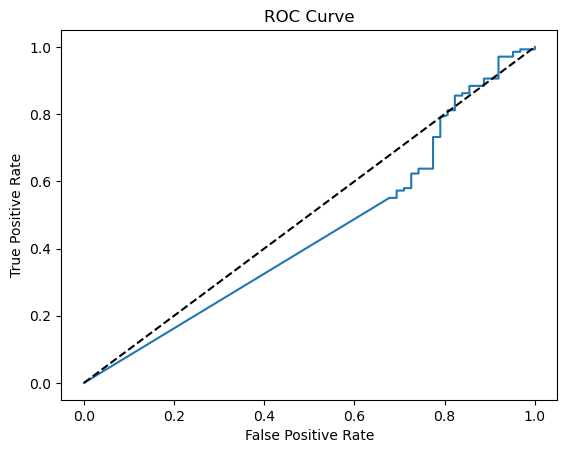

In [132]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Apply a threshold to convert continuous target to binary
y_test_binary = (y_test > 0.5).astype(int)

FPR, TPR, _ = roc_curve(y_test_binary, y_test_pred)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')